In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
df = pd.json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
mapa_colunas = {
    # Cliente
    'customerID': 'id_cliente',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'idoso',
    'customer.Partner': 'possui_parceiro',
    'customer.Dependents': 'possui_dependentes',
    'customer.tenure': 'tempo_contrato_meses',

    # Serviços de telefone
    'phone.PhoneService': 'servico_telefone',
    'phone.MultipleLines': 'multiplas_linhas',

    # Serviços de internet
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguranca_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'protecao_dispositivo',
    'internet.TechSupport': 'suporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_filmes',

    # Conta
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'fatura_digital',
    'account.PaymentMethod': 'metodo_pagamento',
    'account.Charges.Monthly': 'valor_mensal',
    'account.Charges.Total': 'valor_total',

    # Churn
    'churn': 'evasao'
}

df = df.rename(columns=mapa_colunas)


In [9]:
mapa_sim_nao = {
    'Yes': 'Sim',
    'No': 'Não'
}

colunas_sim_nao = [
    'possui_parceiro',
    'possui_dependentes',
    'servico_telefone',
    'multiplas_linhas',
    'seguranca_online',
    'backup_online',
    'protecao_dispositivo',
    'suporte_tecnico',
    'streaming_tv',
    'streaming_filmes',
    'fatura_digital',
    'evasao'
]

# Fix: The 'Churn' column was not renamed to 'evasao' in the previous step due to a case-sensitivity issue.
# Renaming it here to ensure 'evasao' column exists for further processing in this cell.
# The more appropriate long-term fix is to correct the 'mapa_colunas' in the previous cell (PENx2pQCyFqM)
# by changing 'churn': 'evasao' to 'Churn': 'evasao'.
if 'Churn' in df.columns:
    df.rename(columns={'Churn': 'evasao'}, inplace=True)

for col in colunas_sim_nao:
    # Added a check to prevent errors if a column might be missing, although 'evasao' should now be present.
    if col in df.columns:
        df[col] = df[col].replace(mapa_sim_nao)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame. Skipping.")

In [10]:
df['genero'] = df['genero'].replace({
    'Female': 'Feminino',
    'Male': 'Masculino'
})


In [11]:
df['tipo_contrato'] = df['tipo_contrato'].replace({
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': 'Bienal'
})


In [12]:
df['tipo_internet'] = df['tipo_internet'].replace({
    'Fiber optic': 'Fibra óptica',
    'DSL': 'DSL',
    'No': 'Sem internet'
})


In [13]:
df['metodo_pagamento'] = df['metodo_pagamento'].replace({
    'Electronic check': 'Cheque eletrônico',
    'Mailed check': 'Cheque enviado',
    'Bank transfer (automatic)': 'Transferência bancária (automática)',
    'Credit card (automatic)': 'Cartão de crédito (automático)'
})


In [14]:
df.replace({
    'No internet service': 'Sem internet',
    'No phone service': 'Sem telefone'
}, inplace=True)


In [15]:
df['valor_total'] = pd.to_numeric(df['valor_total'], errors='coerce')


In [16]:
df['contas_diarias'] = df['valor_mensal'] / 30


In [17]:
df.head()

,id_cliente,evasao,genero,idoso,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefone,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,valor_total,contas_diarias
0,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Anual,Sim,Cheque enviado,65.6,593.30,2.186667
1,0003-MKNFE,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,Cheque enviado,59.9,542.40,1.996667
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fibra óptica,...,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.9,280.85,2.463333
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.0,1237.85,3.266667
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,83.9,267.40,2.796667


In [19]:
df = df.drop_duplicates(subset='id_cliente')


In [20]:
df['valor_mensal'] = pd.to_numeric(df['valor_mensal'], errors='coerce')
df['valor_total'] = pd.to_numeric(df['valor_total'], errors='coerce')


In [21]:
df['valor_total'] = df['valor_total'].fillna(
    df['valor_mensal'] * df['tempo_contrato_meses']
)


In [22]:
df['idoso'] = df['idoso'].replace({0: 'Não', 1: 'Sim'})


In [23]:
colunas_sim_nao = [
    'possui_parceiro',
    'possui_dependentes',
    'servico_telefone',
    'multiplas_linhas',
    'seguranca_online',
    'backup_online',
    'protecao_dispositivo',
    'suporte_tecnico',
    'streaming_tv',
    'streaming_filmes',
    'fatura_digital',
    'evasao'
]

df[colunas_sim_nao] = df[colunas_sim_nao].replace({
    'Yes': 'Sim',
    'No': 'Não',
    'Sem internet': 'Não',
    'Sem telefone': 'Não'
})


In [24]:
df.loc[df['servico_telefone'] == 'Não', 'multiplas_linhas'] = 'Não'


In [25]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7267 non-null   object 
 1   evasao                7267 non-null   object 
 2   genero                7267 non-null   object 
 3   idoso                 7267 non-null   object 
 4   possui_parceiro       7267 non-null   object 
 5   possui_dependentes    7267 non-null   object 
 6   tempo_contrato_meses  7267 non-null   int64  
 7   servico_telefone      7267 non-null   object 
 8   multiplas_linhas      7267 non-null   object 
 9   tipo_internet         7267 non-null   object 
 10  seguranca_online      7267 non-null   object 
 11  backup_online         7267 non-null   object 
 12  protecao_dispositivo  7267 non-null   object 
 13  suporte_tecnico       7267 non-null   object 
 14  streaming_tv          7267 non-null   object 
 15  streaming_filmes     

,0
id_cliente,0
evasao,0
genero,0
idoso,0
possui_parceiro,0
possui_dependentes,0
tempo_contrato_meses,0
servico_telefone,0
multiplas_linhas,0
tipo_internet,0


In [26]:
df.shape


(7267, 22)

In [27]:
df[['tempo_contrato_meses', 'valor_mensal', 'valor_total', 'contas_diarias']].describe()


,tempo_contrato_meses,valor_mensal,valor_total,contas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157337
std,24.571773,30.129572,2268.648587,1.004319
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.425000,396.200000,1.180833
50%,29.000000,70.300000,1389.200000,2.343333
75%,55.000000,89.875000,3778.525000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


In [28]:
df['evasao'].value_counts()


,count
evasao,
Não,5174
Sim,1869
,224


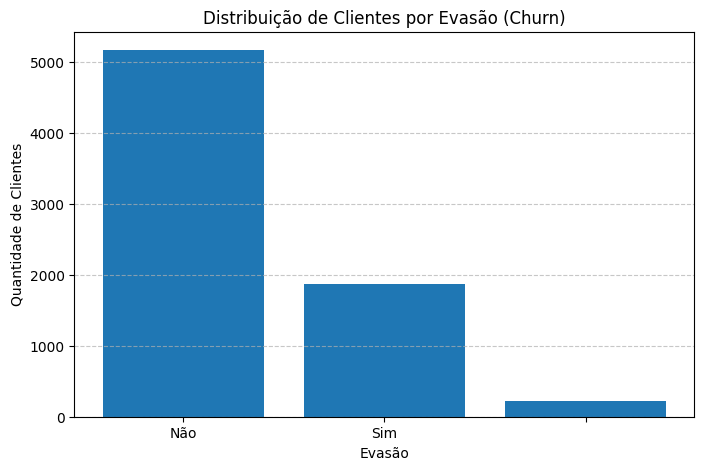

In [31]:
import matplotlib.pyplot as plt

contagem_churn = df['evasao'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(contagem_churn.index, contagem_churn.values)
plt.title('Distribuição de Clientes por Evasão (Churn)')
plt.xlabel('Evasão')
plt.ylabel('Quantidade de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [32]:
df['evasao'].value_counts(normalize=True) * 100


,proportion
evasao,
Não,71.198569
Sim,25.719004
,3.082427


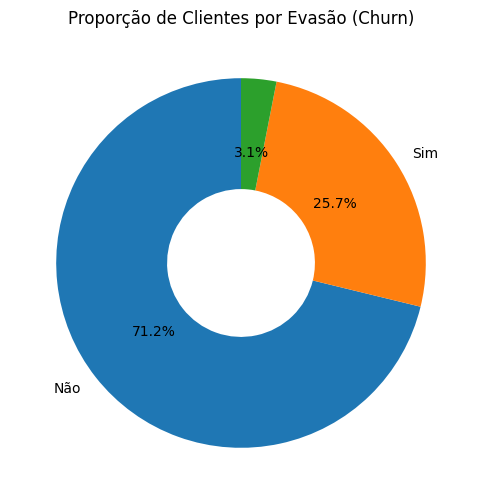

In [35]:
# Calcular proporção
proporcao_churn = df['evasao'].value_counts(normalize=True)

# Criar gráfico em rosca
plt.figure(figsize=(6, 6))
plt.pie(
    proporcao_churn.values,
    labels=proporcao_churn.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.6}
)

plt.title('Proporção de Clientes por Evasão (Churn)')
plt.show()

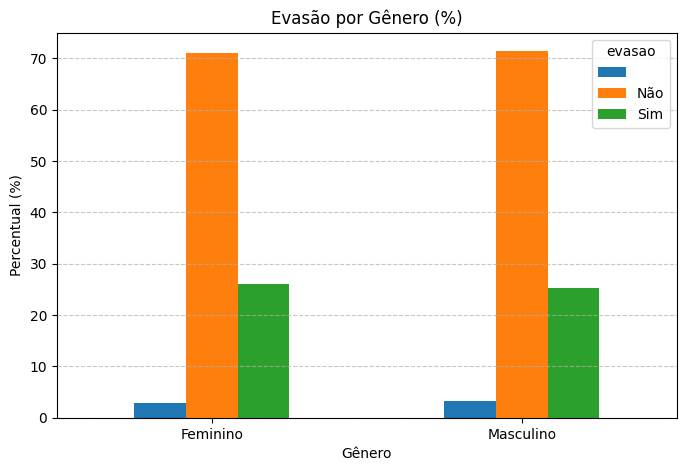

In [37]:
import matplotlib.pyplot as plt

tabela_genero = pd.crosstab(df['genero'], df['evasao'], normalize='index') * 100

tabela_genero.plot(kind='bar', figsize=(8, 5))
plt.title('Evasão por Gênero (%)')
plt.xlabel('Gênero')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


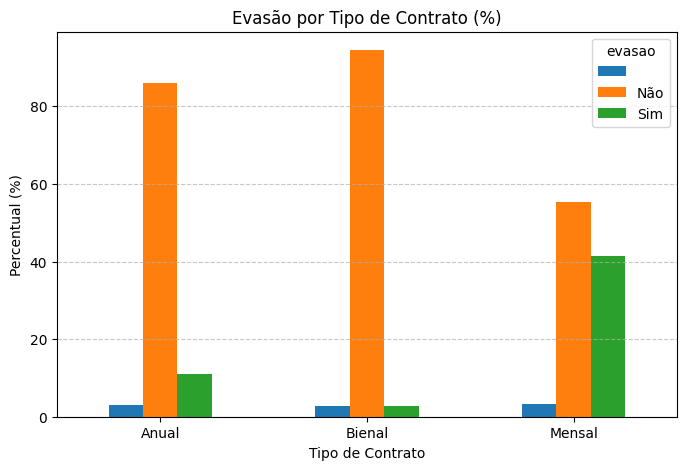

In [39]:
tabela_contrato = pd.crosstab(df['tipo_contrato'], df['evasao'], normalize='index') * 100

tabela_contrato.plot(kind='bar', figsize=(8, 5))
plt.title('Evasão por Tipo de Contrato (%)')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


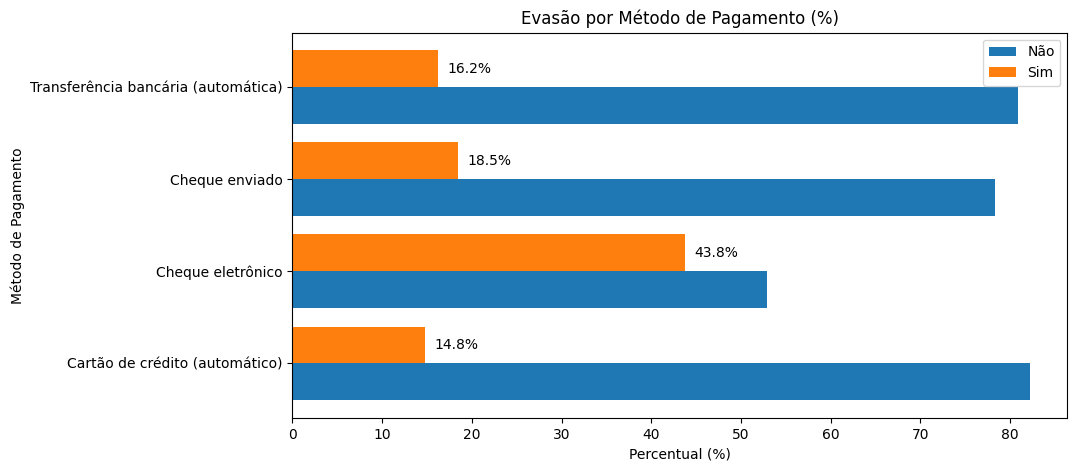

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Tabela normalizada (%)
tabela_pagamento = pd.crosstab(
    df['metodo_pagamento'],
    df['evasao'],
    normalize='index'
) * 100

# Posições no eixo Y
y = np.arange(len(tabela_pagamento.index))
altura = 0.4

plt.figure(figsize=(10, 5))

# Barra "Não"
plt.barh(
    y - altura/2,
    tabela_pagamento['Não'],
    height=altura,
    label='Não'
)

# Barra "Sim"
plt.barh(
    y + altura/2,
    tabela_pagamento['Sim'],
    height=altura,
    label='Sim'
)

# Adicionar porcentagem na ponta da barra "Sim"
for i, valor in enumerate(tabela_pagamento['Sim']):
    plt.text(
        valor + 1,           # ligeiramente à direita da barra
        y[i] + altura/2,     # mesma linha da barra "Sim"
        f'{valor:.1f}%',
        va='center'
    )

plt.yticks(y, tabela_pagamento.index)
plt.xlabel('Percentual (%)')
plt.ylabel('Método de Pagamento')
plt.title('Evasão por Método de Pagamento (%)')
plt.legend()
plt.show()


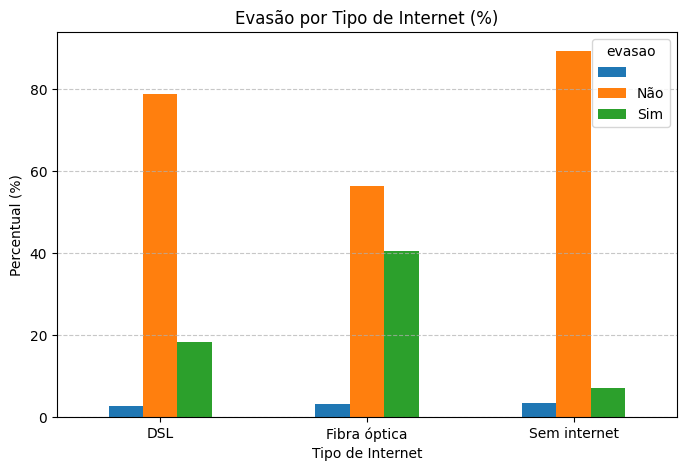

In [48]:
tabela_internet = pd.crosstab(df['tipo_internet'], df['evasao'], normalize='index') * 100

tabela_internet.plot(kind='bar', figsize=(8, 5))
plt.title('Evasão por Tipo de Internet (%)')
plt.xlabel('Tipo de Internet')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 800x500 with 0 Axes>

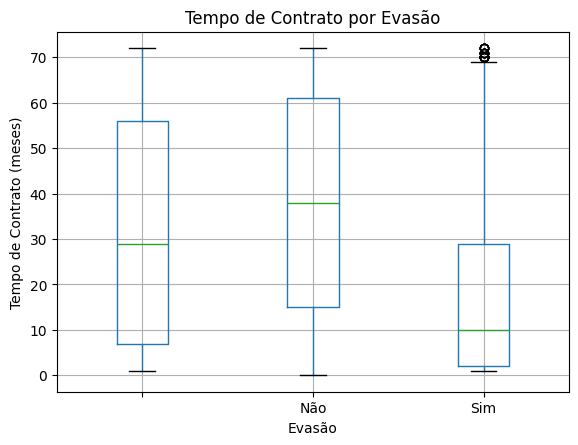

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df.boxplot(
    column='tempo_contrato_meses',
    by='evasao'
)

plt.title('Tempo de Contrato por Evasão')
plt.suptitle('')
plt.xlabel('Evasão')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()


<Figure size 800x500 with 0 Axes>

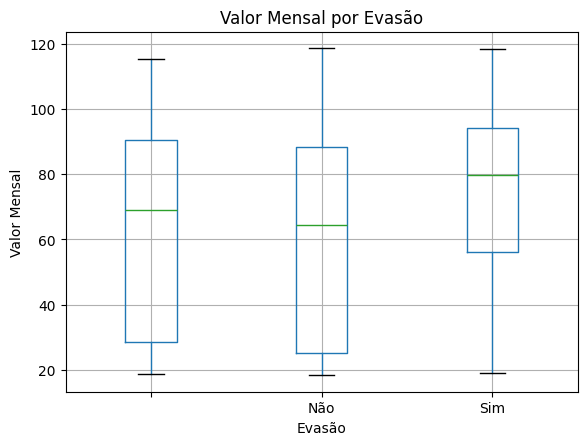

In [50]:
plt.figure(figsize=(8, 5))
df.boxplot(
    column='valor_mensal',
    by='evasao'
)

plt.title('Valor Mensal por Evasão')
plt.suptitle('')
plt.xlabel('Evasão')
plt.ylabel('Valor Mensal')
plt.show()


<Figure size 800x500 with 0 Axes>

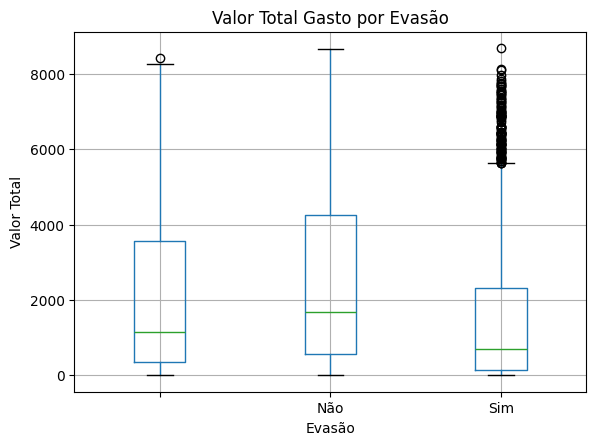

In [51]:
plt.figure(figsize=(8, 5))
df.boxplot(
    column='valor_total',
    by='evasao'
)

plt.title('Valor Total Gasto por Evasão')
plt.suptitle('')
plt.xlabel('Evasão')
plt.ylabel('Valor Total')
plt.show()


In [52]:
df.groupby('evasao')[[
    'tempo_contrato_meses',
    'valor_mensal',
    'valor_total'
]].agg(['mean', 'median'])


tempo_contrato_meses        valor_mensal          valor_total          
                       mean median         mean  median         mean    median
evasao                                                                        
                  31.571429   29.0    63.412277  69.100  2196.933705  1163.175
Não               37.569965   38.0    61.265124  64.425  2549.911442  1679.525
Sim               17.979133   10.0    74.441332  79.650  1531.796094   703.550

In [ ]:
#Introdução

A evasão de clientes ( churn ) representa um dos principais desafios enfrentados pelas empresas do setor de telecomunicações,
 uma vez que impacta diretamente a receita e os custos operacionais. Identificar os fatores associados ao cancelamento dos serviços
  é essencial para a definição de estratégias estratégicas de retenção.

Este trabalho tem como objetivo analisar o comportamento dos clientes da empresa TelecomX , utilizando técnicas de Análise
 Exploratória de Dados (EDA), a fim de compreender os padrões associados à evasão. A partir dessa análise, busca-se gerar
 insights que auxiliem na tomada de decisão e na redução do churn.

#Limpeza e Tratamento de Dados

Os dados foram obtidos a partir de um arquivo JSON disponibilizado em um repositório público. Inicialmente, foi realizada a
 importação dos dados e a normalização da estrutura, uma vez que o arquivo possuía campos aninados.

As principais etapas do tratamento incluíram:

Normalização do JSON utilizandopd.json_normalize

Renomeação das colunas para o padrão Português-BR

Padronização dos valores categóricos (ex.: Sim/Não para Sim/Não )

Conversão de variáveis ​​numéricas para o tipo adequado

Tratamento de valores ausentes, especialmente na variável de faturamento total

Remoção de registros duplicados

Verificação de inconsistências lógicas entre variáveis

Criação de variáveis ​​derivadas, como o valor

Essas etapas garantiram um conjunto de dados limpo, consistente e preparado para a análise exploratória.

#Análise Exploratória de Dados (EDA)

A análise exploratória foi conduzida com o objetivo de compreender o perfil dos clientes e identificar padrões associados à evasão.

📊 Distribuição do Churn

Foi fornecida uma proporção de clientes que atenderam e os que cancelaram o serviço, utilizando gráficos de barras e gráficos em rosca. Observe-se que uma parcela significativa da base apresenta evasão, o que reforça a relevância do problema para o negócio.

📦 Evasão por Variáveis ​​Categóricas

A evasão foi comprovada em função de variáveis ​​como:

Gênero

Tipo de

Método de pagamento

Tipo de serviço de internet

Os resultados indicaram que:

Clientes com contrato mensal apresentam taxas de evasão significativamente maiores

Determinados métodos de pagamento, como cheque eletrônico , estão associados a maior rotatividade

O gênero não apresentou diferenças relevantes na taxa de evasão

💰 Evasão por Variáveis ​​Numéricas

Foram utilizados boxplots para comparar clientes que evadiram e os que encontraram em relação a:

Tempo de caro

Valor mensal

Valor total gasto

Os gráficos evidenciaram que os clientes que cancelaram:

Possuem menor tempo de contrato

Apresentam valores monetários mais elevados

Possuem menor valor total gasto , reflexo do menor tempo de permanência

#Conclusões e Insights

A análise permitiu identificar padrões claros relacionados à evasão de clientes:

O tempo de contrato é um dos principais indicadores de rotatividade, com maior evasão nos primeiros meses

Contratos mensais apresentam risco significativamente maior de cancelamento

Valores monetários elevados podem estar associados à insatisfação com o custo do serviço

Métodos de pagamento não automáticos tendem a apresentar maiores taxas de evasão

Essas descobertas demonstram que a evasão está mais relacionada a fatores contratuais e financeiros que as características demográficas.

#Recomendações

Com base nos resultados obtidos, recomenda-se:

Criar estratégias de planejamento focadas nos primeiros meses de contrato

Incentivar a migração de clientes de contratos mensais para planos de maior duração

Oferecer benefícios ou descontos progressivos para clientes com alto valor mensal

Estimular o uso de métodos de pagamento automáticos , fricções operacionais rápidas

Implementar ações proativas para clientes identificados como alto risco de rotatividade

#Considerações Finais

Este estudo apresentado como a Análise Exploratória de Dados pode fornecer insights importantes para a compreensão do
comportamento dos clientes. A aplicação dessas análises pode auxiliar a empresa na tomada de decisões estratégicas voltadas à
redução da evasão e ao aumento da fidelização.